In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import re
import seaborn as sns
import plotly.express as px
import numpy as np
sns.set(color_codes = True)
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#reading the data set
data_df = pd.read_csv("data/cleaned_data.csv")

In [3]:
data_df.describe()

,Unnamed: 0,rate,votes,cost_for_two
count,10312.000000,10312.000000,10312.000000,10312.000000
mean,2402.370927,3.621412,222.047808,520.380043
std,1542.708139,0.592925,652.290802,412.325752
min,0.000000,1.000000,0.000000,40.000000
25%,1048.750000,3.300000,12.000000,300.000000
50%,2238.000000,3.700000,42.000000,400.000000
75%,3930.250000,4.000000,167.000000,600.000000
max,4999.000000,5.000000,16832.000000,6000.000000


In [4]:
data_df = data_df.drop(["Unnamed: 0"], axis = 1)

In [5]:
data_df.head(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,reviews_list,listed_as,listed_in_city
0,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet Delivery Dine-out Delivery,Banashankari Banashankari Banashankari Basavan...
1,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet Dine-out,Banashankari Banashankari
2,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet Dine-out Buffet Dine-out,Banashankari Banashankari Basavanagudi Basavan...
3,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Buffet Delivery Dine-out,Banashankari Banashankari Banashankari
4,"12,29 Near PES University Back Gate, D'Souza N...",Caf Down The Alley,Yes,No,4.1,402,Banashankari,Cafe,Cafe,500.0,"[('Rated 4.0', 'RATED\n We ended up here on a...",Cafes Delivery Dine-out,Banashankari Banashankari Banashankari


In [6]:
data_df.shape

(10312, 13)

In [7]:
data_df.dtypes

address            object
name               object
online_order       object
book_table         object
rate              float64
votes               int64
location           object
rest_type          object
cuisines           object
cost_for_two      float64
reviews_list       object
listed_as          object
listed_in_city     object
dtype: object

Checking the distribution of ratings

3.6214119472459503


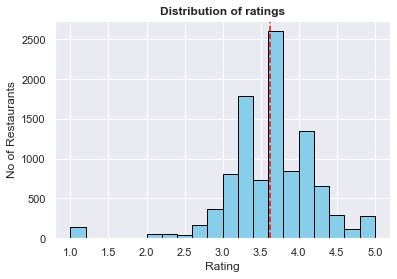

In [8]:
plt.hist(data_df['rate'], color = 'skyblue', edgecolor = 'black',bins = int(100/5))
plt.axvline(x = data_df['rate'].mean(),ls='--',color='red')
plt.title('Distribution of ratings',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data_df['rate'].mean())
plt.show()

In [9]:
data_df.online_order.replace(('Yes','No'),(1, 0),inplace=True)
data_df.book_table.replace(('Yes','No'),(1, 0),inplace=True)
data_df.dtypes

address            object
name               object
online_order        int64
book_table          int64
rate              float64
votes               int64
location           object
rest_type          object
cuisines           object
cost_for_two      float64
reviews_list       object
listed_as          object
listed_in_city     object
dtype: object

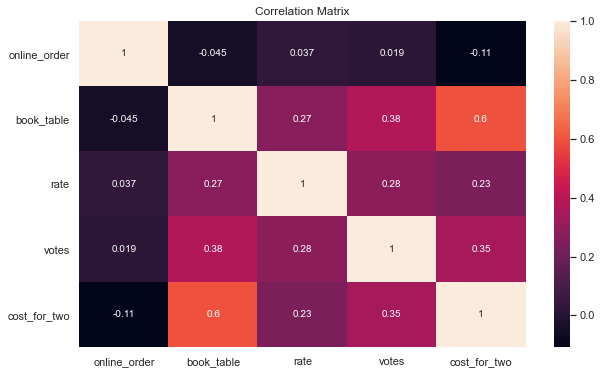

In [10]:
heat_corr = data_df.corr()
plt.figure(figsize=(10, 6))
corr_matrix = sns.heatmap(heat_corr, annot=True)
corr_matrix.set_yticklabels(corr_matrix.get_yticklabels(), rotation=360)

plt.title("Correlation Matrix")
plt.show()

In [11]:
mean_ratings = data_df.groupby(['name'], as_index=False)['rate','votes'].mean()
mean_ratings.columns=['name','mean_rating','mean_votes']
mean_ratings = mean_ratings.sort_values("mean_rating", ascending=False)
top_20 = mean_ratings.head(20)
top_20.head(20)

,name,mean_rating,mean_votes
7172,repEAT Hub,5.0,2.0
3434,Ksheera Sagar,5.0,4.0
3829,Maruti Sweets,5.0,2.0
3799,Manhattan,5.0,13.0
3778,Manashi Paratha & Pav Bhaji,5.0,6.0
3714,Maestros Cafe,5.0,2.0
3662,MACHALI,5.0,6.0
3655,M-Aura Kitchen Cafe & More,5.0,2.0
3651,Lyengar's Cakes N Cookies,5.0,5.0
3620,LocalHost,5.0,80.0


Text(-8.449999999999996, 0.5, 'No of Votes')

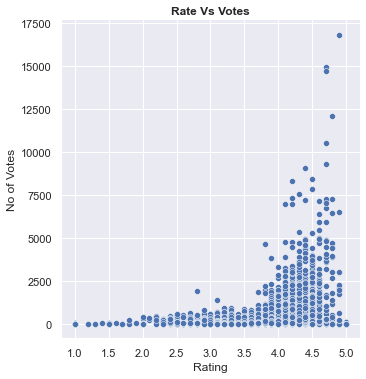

In [12]:
sns.relplot(x="rate", y="votes", data=data_df)
plt.title('Rate Vs Votes',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Votes')

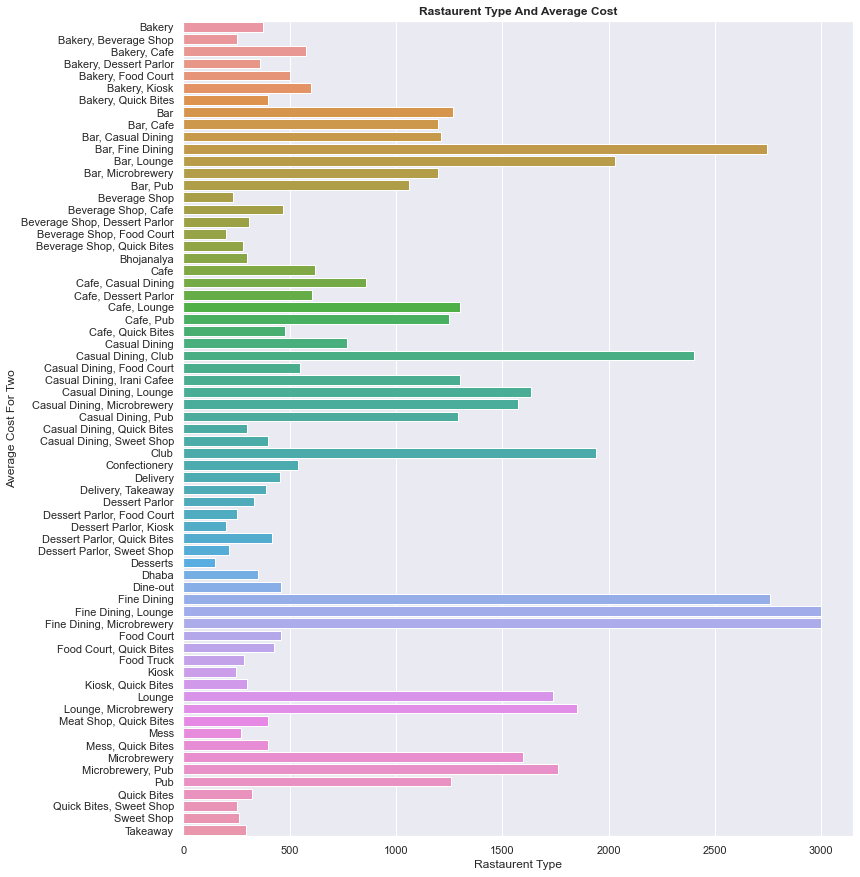

In [13]:
mean_costs = data_df.groupby(['rest_type'], as_index=False)['rate','cost_for_two'].mean()
mean_costs.columns=['rest_type','rating','cost_for_two']

plt.figure(figsize=(12, 15))
sns.barplot(x="cost_for_two", y="rest_type", data=mean_costs,orient='h')
plt.title('Rastaurent Type And Average Cost',weight='bold')
plt.xlabel('Rastaurent Type')
plt.ylabel('Average Cost For Two')
plt.show()

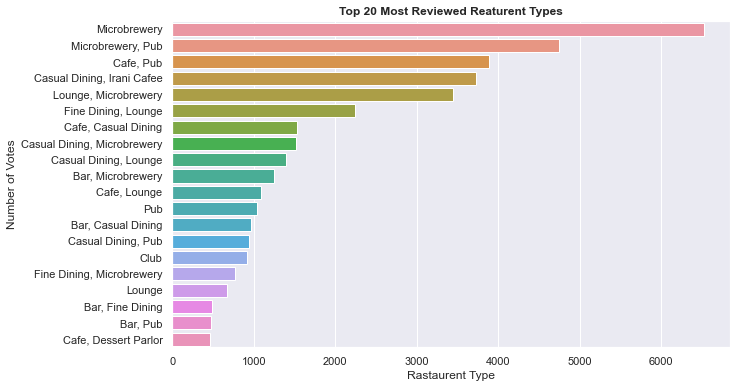

In [14]:
mean_votes = data_df.groupby(['rest_type'], as_index=False)['votes'].mean()
mean_votes.columns=['rest_type','votes']
mean_votes = mean_votes.sort_values("votes", ascending=False)
top_voted_20 = mean_votes.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x="votes", y="rest_type", data=top_voted_20,orient='h')
plt.title('Top 20 Most Reviewed Reaturent Types',weight='bold')
plt.xlabel('Rastaurent Type')
plt.ylabel('Number of Votes')
plt.show()

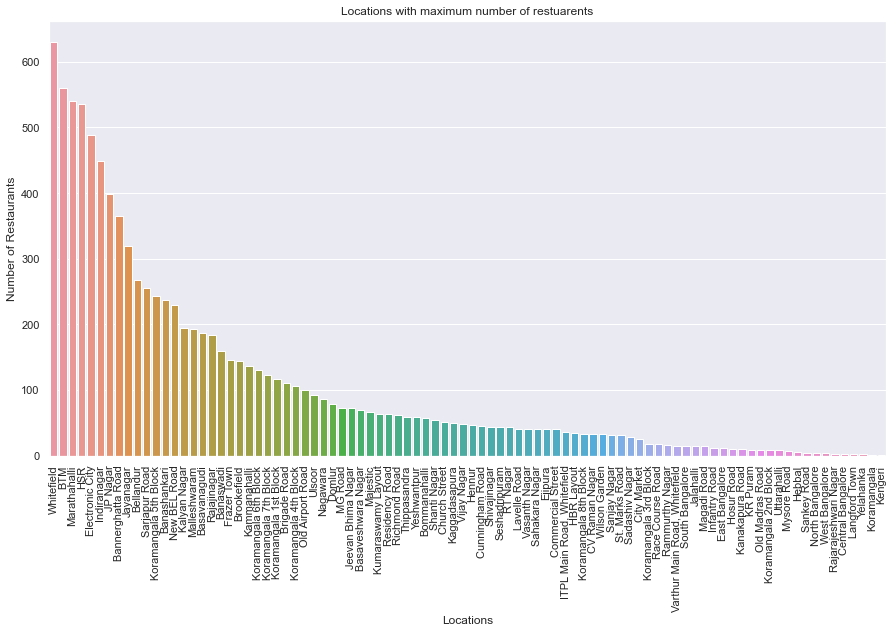

In [15]:
city_counts = data_df.groupby(['location'], as_index=False)['address'].nunique()

city_counts.columns=['location','number_of_restaurents']
city_counts = city_counts.sort_values("number_of_restaurents", ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x="location", y="number_of_restaurents", data = city_counts )
plt.xticks(rotation=90)
plt.xlabel('Locations')
plt.ylabel('Number of Restaurants')
plt.title('Locations with maximum number of restuarents')
plt.show()

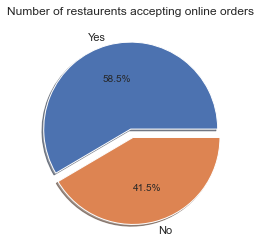

In [16]:
online_df = data_df['online_order'].value_counts()
plt.pie(online_df.values, labels=['Yes','No'], autopct='%1.1f%%', explode=(0, 0.1) ,shadow=True)
plt.title('Number of restaurents accepting online orders')
plt.show()

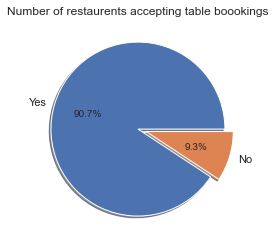

In [17]:
table_booking_df = data_df['book_table'].value_counts()
plt.pie(table_booking_df.values, labels=['Yes','No'], autopct='%1.1f%%', explode=(0, 0.1) ,shadow=True)
plt.title('Number of restaurents accepting table boookings')
plt.show()

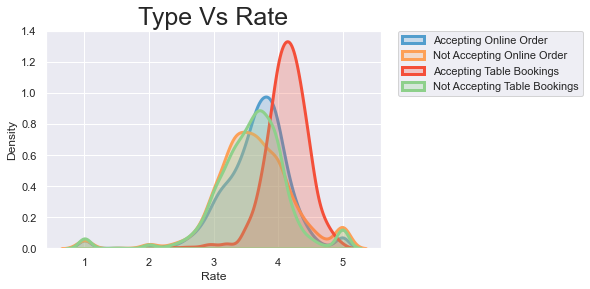

In [18]:
g = sns.distplot(data_df[data_df['online_order']==1]['rate'].values, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Accepting Online Order',color='#539ecd')
g = sns.distplot(data_df[data_df['online_order']==0]['rate'].values, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Not Accepting Online Order',color='#fda057')
g = sns.distplot(data_df[data_df['book_table']==1]['rate'].values, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Accepting Table Bookings',color='#f44f39')
g = sns.distplot(data_df[data_df['book_table']==0]['rate'].values, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Not Accepting Table Bookings',color='#8ed08b')

plt.title('Type Vs Rate', fontsize=25)
plt.xlabel('Rate')
plt.legend(['Accepting Online Order', 'Not Accepting Online Order','Accepting Table Bookings','Not Accepting Table Bookings'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

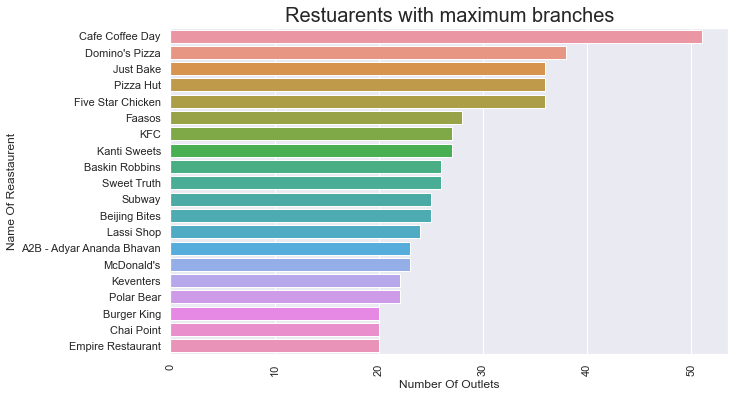

In [19]:
outlet_counts = data_df.groupby(['name'], as_index=False)['address'].nunique()

outlet_counts.columns=['name','number_of_oulets']
outlet_counts = outlet_counts.sort_values("number_of_oulets", ascending=False)
outlet_counts = outlet_counts.head(20)
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.barplot(x="number_of_oulets", y="name", data=outlet_counts,orient ='h')
plt.ylabel('Name Of Reastaurent')
plt.xlabel('Number Of Outlets')
plt.title('Restuarents with maximum branches', fontsize=20)
plt.show()

In [20]:
data_df.reviews_list.replace(to_replace=r'\\n',value=' ',regex=True,inplace=True)
data_df.reviews_list.replace(to_replace=r"'\(',",value=' ',regex=True,inplace=True)
data_df.reviews_list.replace(to_replace=r'"',value="'",regex=True,inplace=True)
data_df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,reviews_list,listed_as,listed_in_city
0,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED Had been here for dinn...",Buffet Delivery Dine-out Delivery,Banashankari Banashankari Banashankari Basavan...
1,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', 'RATED Great food and proper ...",Buffet Dine-out,Banashankari Banashankari
2,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED Very good restaurant i...",Buffet Dine-out Buffet Dine-out,Banashankari Banashankari Basavanagudi Basavan...
3,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,0,0,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,"[('Rated 5.0', 'RATED Awesome food ??Great s...",Buffet Delivery Dine-out,Banashankari Banashankari Banashankari
4,"12,29 Near PES University Back Gate, D'Souza N...",Caf Down The Alley,1,0,4.1,402,Banashankari,Cafe,Cafe,500.0,"[('Rated 4.0', 'RATED We ended up here on a ...",Cafes Delivery Dine-out,Banashankari Banashankari Banashankari
